
<img src="gettyimages-1152348711-612x612.jpg" alt="Plane Image" style="width:1150px;height:420px;">


# Aviation Risk Assessment: Data-Driven Recommendations for Aircraft Purchases



**Author:** Njiru Logan Kimathi
***

## Overview
***


My project aims to assess the risks associated with different aircraft makes and models to guide my company's entry into the aviation industry. Using aviation accident data from the NTSB for the years(1962-2023), I will analyze accident trends, identify potential safety concerns, and highlight which aircraft types are the safest or most risky for commercial and private use.


## Business Problem
***



<img src="AdobeStock_193862513.jpeg" alt="Plane Image" style="width:1150px;height:410px;">

My company is expanding into the aviation sector but lacks understanding about the safety risks associated with different aircraft models for both commercial and private operations. The key business question is to **determine which aircraft models present the lowest risk**, based on historical accident data.

Solving this problem will allow the company to make informed decisions in prioritizing low-risk aircraft purchases and strengthen its market entry strategy




## Data Understanding
***

The [dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) used in this project comes from the National Transportation Safety Board (NTSB) and contains information about civil aviation accidents and selected incidents from 1962 to 2023. The data includes accidents and incidents within the United States and in international waters.

* This data is directly relevant to the project's goal of assessing aviation risks, as it includes detailed information on past aviation accidents, including both the conditions and outcomes of accidents/incidents.
* Each record in the dataset represents a specific aviation accident or incident. It includes variables related to the event, covering the event information, aircraft details, injury details and operational deatils. 


Variable categories include:
* **Event information**: Event.Id, Accident.Number, Event.Date, Location, Latitude, Longitude.

* **Aircraft details**: Make, Model, Registration Number, Number of Engines, Engine Type, Aircraft.damage (e.g. Destroyed), Aircraft.Category, Amateur.Built (Yes/No) whether the aircraft was built by professionals or amateurs.

* **Injury details**: Injury.Severity (e.g. Fatal(2), Fatal(3) with the number of fatalities in brackets), Total.Fatal Injuries, Total.Serious Injuries, Total.Minor Injuries, Total.Uninjured.

* **Operational details**: Investigation.Type, Purpose.of.flight (e.g. Personal, Business), Broad.phase.of.flight (e.g. Cruise) - is the phase of flight when the accident occured, Report.Status (e.g. Probable Cause), Weather.Condition (i.e IMC - poor visibiliy conditions requiring flying priamrily by instruments, VMC - good visibility condtions, UNK-Unknown weather conditions during the accident ).

## Data Inspection
***

I'll start by importing the standard data science libraries


In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Loading the dataset into a datframe "df"

df = pd.read_csv("AviationData.csv", encoding = "latin-1", low_memory=False)
df.head() # display the first 5 records to ensure the datset is loaded correctly


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,24/10/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,19/07/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19/09/1996
2,20061025X01555,Accident,NYC07LA005,30/08/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26/02/2007
3,20001218X45448,Accident,LAX96LA321,19/06/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/09/2000
4,20041105X01764,Accident,CHI79FA064,02/08/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16/04/1980


In [3]:
df.tail() #display the last 5 records 

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,2.02212E+13,Accident,ERA23LA093,26/12/2022,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29/12/2022
88885,2.02212E+13,Accident,ERA23LA095,26/12/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,2.02212E+13,Accident,WPR23LA075,26/12/2022,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27/12/2022
88887,2.02212E+13,Accident,WPR23LA076,26/12/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,2.02212E+13,Accident,ERA23LA097,29/12/2022,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30/12/2022


From the above, it is clear that the dataset is uniform from top to bottom. All records have the same columns.

Next, let's see a summary of the data

In [43]:
print(df.shape,"\n") #number of rows by columns of the dataset
df.info() #display a summary of the data

(88889, 23) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Injury.Severity         87889 non-null  object 
 7   Aircraft.damage         85695 non-null  object 
 8   Aircraft.Category       88889 non-null  object 
 9   Registration.Number     87572 non-null  object 
 10  Make                    88826 non-null  object 
 11  Model                   88797 non-null  object 
 12  Amateur.Built           88787 non-null  object 
 13  Number.of.Engines       82805 non-null  float64
 14  Engine.Type             

The dataset has 88,889 records of different aviation accidents and 31 variables. 

Some of the variables have significant numbers of missing values. e.g. longitude, latitude e.t.c.

In [5]:
df.dtypes #inspecting the datatypes of each column

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [6]:
df.duplicated().value_counts() #checking to see if there are any duplicated records in the dataset

False    88889
dtype: int64

All records appear to be unique in the data

## Data Preparation
***
From the inspection it is clear there are significant missing values or NaN values in the dataset.

In this section, I will deal with cleaning the data in preparation for analysis later on.
***
Identifying and handling missing values.
***

In [7]:
# Let's take a closer look at the NaNs

df.isna().sum() # total number of missing values per column

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

Those are a lot of missing values. Let me break them down to percentages for better understanding.

In [8]:
a = df.shape

nan_percent = (df.isna().sum() / a[0])*100 # total percent of missing values per column
nan_percent

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

**Schedule** and **Air Carrier** columns have the highest percentages at 85% and 81% respectively.

Let's have a look at some of the records that have values in those respective columns.

In [9]:
df.loc[df.Schedule.notna(), ["Schedule"]] # show rows that do not have missing values

,Schedule
5,SCHD
22,NSCH
33,NSCH
39,SCHD
43,NSCH
...,...
88866,NSCH
88867,NSCH
88876,SCHD
88879,SCHD


In [10]:
df.loc[df["Air.carrier"].notna(), ["Air.carrier"]] # show rows that do not have missing values

,Air.carrier
5,Air Canada
22,"Rocky Mountain Helicopters, In"
33,Lang Air Service
39,Empire Airlines
43,Joel Frederick's Monarch Air
...,...
88877,GERBER RICHARD E
88879,HAWAIIAN AIRLINES INC
88880,Chandler Air Service
88881,Pilot


Both the variables do not seem to have information that is relevant to this study. Since the company is aiming to purchase its own aircraft, information about Air Carriers will not be useful.

Given they are largely NaN, it would be appropriate to drop the columns.

In [11]:
df.drop(["Air.carrier", "Schedule"], axis = 1, inplace=True) #deleting both columns from the dataset
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

Let's look at **Aircraft.Category** column

In [12]:
df["Aircraft.Category"].value_counts() #shows all the different values in Aircraft Category and their frequencies

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

This information might be useful down the line.

Being categorical data, I'll impute the missing values with the most common value which is "Airplane"

In [13]:
df["Aircraft.Category"].fillna("Airplane", inplace=True) # Filling in the missing values with "Airplane"

Let's look at **FAR Description** column

In [14]:
df["FAR.Description"].value_counts() #shows all the different values in the Column and their frequencies

91                                18221
Part 91: General Aviation          6486
NUSN                               1584
NUSC                               1013
137                                1010
135                                 746
121                                 679
Part 137: Agricultural              437
UNK                                 371
Part 135: Air Taxi & Commuter       298
PUBU                                253
129                                 246
Part 121: Air Carrier               165
133                                 107
Part 129: Foreign                   100
Non-U.S., Non-Commercial             97
Non-U.S., Commercial                 93
Part 133: Rotorcraft Ext. Load       32
Unknown                              22
Public Use                           19
091K                                 14
ARMF                                  8
Part 125: 20+ Pax,6000+ lbs           5
125                                   5
107                                   4


The values in this column seem to represent the Federal Avaiation Regulations (FAR) under which the flight was operating at the time of the accident. These regualtions classify the flights based on purpose and operation type and oversight.

This column has a number of issues present. There appears to be data entry issues where descriptions that should be the same are seperated e.g. 91 and Part 91: General Aviation, 137 and Part 137:Agriculture e.t.c.

Most of the descriptions are not well labelled hence difficult to understand what they represent.

And peharps the most important issue to me is that in the context of this study, the information conveyed by this column can also from retrieved from another column, **Purpose of flight**, which has less NaN values

For those reasons, I choose to drop the column as it is redudant for this study.


In [15]:
df.drop("FAR.Description", axis = 1, inplace=True)

Let's look at **Broad.phase.of.flight** column

In [16]:
df["Broad.phase.of.flight"].value_counts()

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

This information might be useful later on. Maybe in determining if particular planes have a higher accident risk at a particular phase of flight.

Since "unknown" is already a category, I'll impute the missing values with "Unknown".

In [17]:
df["Broad.phase.of.flight"].fillna("Unknown", inplace=True) #imputing the missing values in the column

For **Latitude** and **Longitude** columns, the geographical location of accidents may not provide insights as to which **aircraft types** are safest or most risky to operate and purchase.

The **Publication.Date** as well does not serve a purpose here since these reports can be published years after the accident.

**Airport.Code** is also not useful in this study and neither is **Airport.Name**. Aiport details will not provide relevant details.


These columns do not add much value to the study so I'll drop them.


In [18]:
df.drop(["Latitude","Longitude","Publication.Date","Airport.Code","Airport.Name"], axis = 1, inplace=True) #dropping the irrelevant columns

For the injury details columns, the values are numerical representing the number of people affected, with the lowest entry appearing to be "0". Assuming missing values mean no injuries, I'll impute the NaNs with 0.

Imputing with mean would be unrealistic in this context as the value might be a fraction.

In [19]:
#Filling in all the missing values in the columns containing injury details with 0

df[["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]] = df[["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]].fillna(0)


Let's take a look at the current state of the dataset


In [20]:
nan_percent_2 = (df.isna().sum() / a[0])*100 # new total percent of missing values per column
nan_percent_2

Event.Id                  0.000000
Investigation.Type        0.000000
Accident.Number           0.000000
Event.Date                0.000000
Location                  0.058500
Country                   0.254250
Injury.Severity           1.124999
Aircraft.damage           3.593246
Aircraft.Category         0.000000
Registration.Number       1.481623
Make                      0.070875
Model                     0.103500
Amateur.Built             0.114750
Number.of.Engines         6.844491
Engine.Type               7.961615
Purpose.of.flight         6.965991
Total.Fatal.Injuries      0.000000
Total.Serious.Injuries    0.000000
Total.Minor.Injuries      0.000000
Total.Uninjured           0.000000
Weather.Condition         5.053494
Broad.phase.of.flight     0.000000
Report.Status             7.178616
dtype: float64

The dataset is now mostly cleaned, with less than 10% of missing values present in the relevant columns which might be used in this study.

Since the proportion of NaN values is small compared to the overall dataset, I can drop the rows with missing values from the dataset without loosing a lot of data.

In [21]:
clean_df = df.dropna() # creating a new cleaned dataframe with no missing values

clean_df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
dtype: int64

In [22]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74743 entries, 0 to 88767
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                74743 non-null  object 
 1   Investigation.Type      74743 non-null  object 
 2   Accident.Number         74743 non-null  object 
 3   Event.Date              74743 non-null  object 
 4   Location                74743 non-null  object 
 5   Country                 74743 non-null  object 
 6   Injury.Severity         74743 non-null  object 
 7   Aircraft.damage         74743 non-null  object 
 8   Aircraft.Category       74743 non-null  object 
 9   Registration.Number     74743 non-null  object 
 10  Make                    74743 non-null  object 
 11  Model                   74743 non-null  object 
 12  Amateur.Built           74743 non-null  object 
 13  Number.of.Engines       74743 non-null  float64
 14  Engine.Type             74743 non-null

The new clean dataset now has 74,743 records and 23 columns.

Good amount to begin analysis with.

## Data Modeling
Now I can be able to answer some relevant business questions 

***
Questions to consider:
* What are the common makes and models of aircrafts generally involved in aviation accidents?
* What are the levels of damages sustained by different aircraft types?
* What are the most common purposes of flights involved in accidents?
* What are the makes and models of flights typically involved in Private and Business flights?
***

Let's answer the first question

**What are the common makes and models of aircrafts involved in accidents?**

Lets find the **top 10** and **bottom 20** common aircraft makes and their frequencies in the dataset

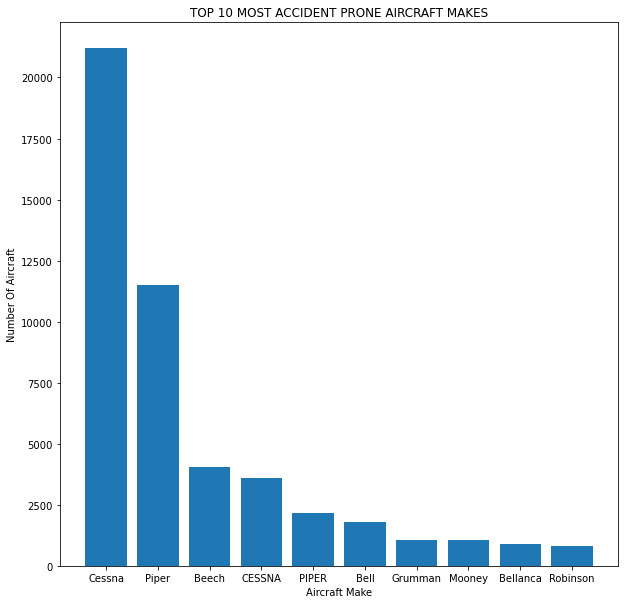

In [23]:
# Plot of the most common makes involved
top_10_aircraft_make = clean_df["Make"].value_counts()[:10]

fig, ax = plt.subplots(figsize = (10,10))

ax.bar(top_10_aircraft_make.index, top_10_aircraft_make.values)
ax.set_title("TOP 10 MOST ACCIDENT PRONE AIRCRAFT MAKES")
ax.set_xlabel("Aircraft Make")
ax.set_ylabel("Number Of Aircraft");


Some Makes appear to be redundant i.e. Cessna and CESSNA and Piper and PIPER

Let me fix that by converting all the make names to lowercase


In [24]:
clean_df.loc[:, 'Make'] = clean_df['Make'].str.lower() #coonverting all the make names to lowercase

c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Let's plot the bar graph again.

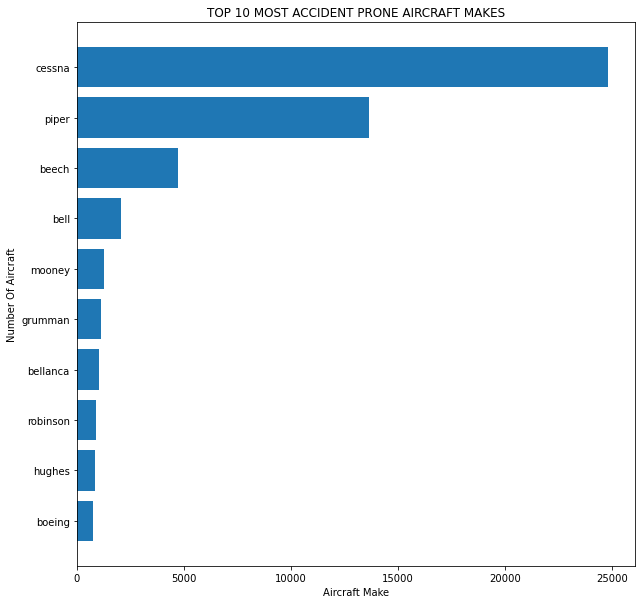

In [25]:
# Plot of the most common makes involved
# lets find the top 10 and bottom 20 aircraft makes and their frequencies in the dataset

top_10_aircraft_make = clean_df["Make"].value_counts()[:10].sort_values(ascending=True)

bottom_20_aircraft_make = clean_df["Make"].value_counts()[-20:]

fig, ax = plt.subplots(figsize = (10,10))

ax.barh(top_10_aircraft_make.index, top_10_aircraft_make.values )
ax.set_title("TOP 10 MOST ACCIDENT PRONE AIRCRAFT MAKES")
ax.set_xlabel("Aircraft Make")
ax.set_ylabel("Number Of Aircraft");

A plot for the least common aircraft makes involved in accidents.

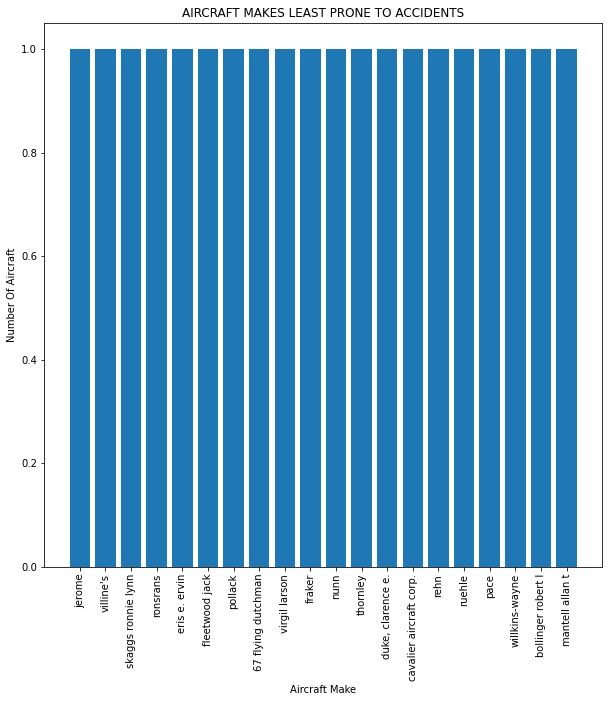

In [26]:
# Plot of the least common makes involved
bottom_20_aircraft_make = clean_df["Make"].value_counts()[-20:]

fig, ax = plt.subplots(figsize = (10,10))

ax.bar(bottom_20_aircraft_make.index, bottom_20_aircraft_make.values )
ax.set_title("AIRCRAFT MAKES LEAST PRONE TO ACCIDENTS")
ax.set_xlabel("Aircraft Make")
ax.set_ylabel("Number Of Aircraft")
ax.tick_params(axis="x", labelrotation=90);


From the plots above, We can see that **Cessna** aircraft had the highest number of aircrafts involved in accidents, well **over 20,000**.

There is also a good number of aircraft makes that had just 1 plane involved in an accident over all those years.

The difference is astonishing between the two groups. For the **Top 10**, they had **over 40,000** aircrafts involved in accidents combined, while the **bottom 20** had **just 20 aircraft** involved.

Let me dig further into this and see the different models involved for some of the different makes.


In [27]:
# Creating a dictionary of all the Aircraft makes and their associated models. The models will be arranged in order of their frequencies
make_and_models = clean_df.groupby("Make")["Model"].apply(lambda x:  x.value_counts(ascending=False).index.tolist()).to_dict()

In [28]:
# I now narrow down to just the top 10 makes and their associated top 10 models
top_10_makes_and_models = {}
for make, model in make_and_models.items():
    if make in top_10_aircraft_make.index:
        top_10_makes_and_models[make] = model[:10]
top_10_makes_and_models

{'beech': ['A36',
  '58',
  'C23',
  'V35B',
  '35',
  '95-B55',
  'F33A',
  '23',
  'A36TC',
  '58P'],
 'bell': ['206B',
  '206L-1',
  '47G',
  '47G-2',
  '206L-3',
  '47G-3B-1',
  '206',
  '47D1',
  'UH-1B',
  '407'],
 'bellanca': ['7GCBC',
  '17-30A',
  '7ECA',
  '8KCAB',
  '8GCBC',
  '7KCAB',
  '17-30',
  '7GCAA',
  '17-31ATC',
  '17-31A'],
 'boeing': ['A75N1',
  'B75N1',
  'E75',
  'A75',
  'A75N1(PT17)',
  '727-200',
  '727-232',
  '737-300',
  'E75N1',
  '727-223'],
 'cessna': ['152',
  '172',
  '172N',
  '172M',
  '150',
  '172P',
  '180',
  '150M',
  '182',
  '150L'],
 'grumman': ['G-164A',
  'G-164B',
  'G-164',
  'AA-5B',
  'AA-5A',
  'G164',
  'AA-1B',
  'AA-5',
  'G164B',
  'G164A'],
 'hughes': ['369D',
  '269C',
  '269A',
  '369HS',
  '269B',
  'OH-6A',
  '369',
  '369E',
  '369A',
  '500D'],
 'mooney': ['M20J',
  'M20C',
  'M20F',
  'M20E',
  'M20K',
  'M20',
  'M20M',
  'M20R',
  'M20A',
  'M20D'],
 'piper': ['PA-28-140',
  'PA-18',
  'PA-28-180',
  'PA-18-150',
  'PA-2

Now I have comprehensive dictionaries of the top 10 aircraft makes and their associated top 10 models.

Let's visualize the makes and their models.

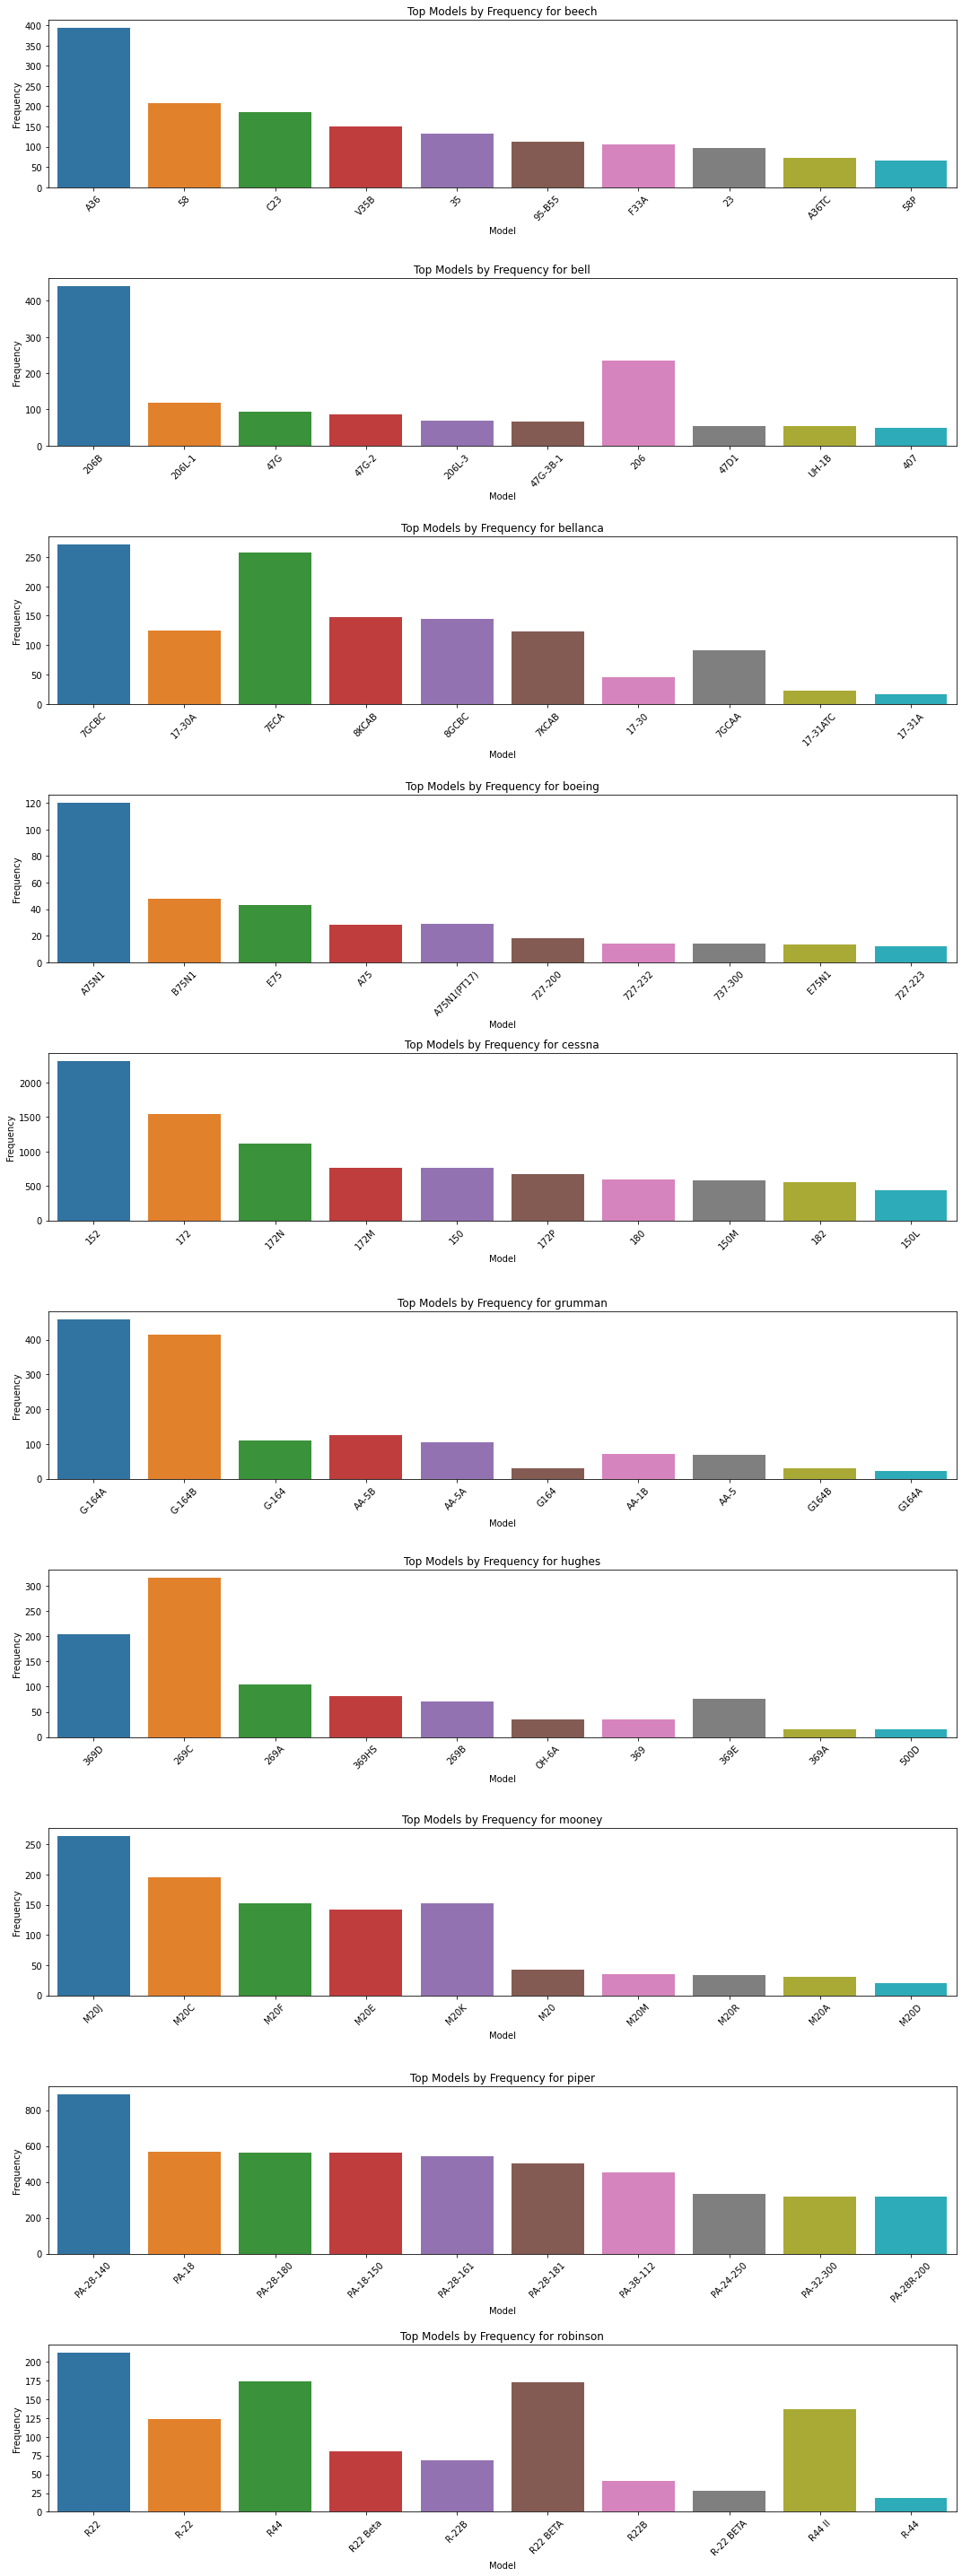

In [29]:
#plot the different top 10 makes and their associated top 10 models

# get the frequencies for each model in each make 
model_counts  = clean_df["Model"].value_counts()
plot_data = []
for make, values in top_10_makes_and_models.items():
    for model in values:
        if model in model_counts.index:
            frequency = model_counts[model]
            plot_data.append([make, model, frequency])# a new list of lists containing each make with a single model and the model frequency

plot_df = pd.DataFrame(plot_data, columns=["Make", "Model", "Frequency"]) # new datframe from the list of lists that I will use to plot the graphs


unique_makes = plot_df["Make"].unique() # getting the unique values of make from the dataframe since they are repeated
n_makes = len(unique_makes) 

# Create the figure and axes objects
fig, axes = plt.subplots(nrows=n_makes, ncols=1, figsize=(15, 40), squeeze=False)

# loop to plot each make in its own subplot
for i in range(n_makes):
    ax = axes[i, 0]  # Access using the index
    make = unique_makes[i]
    
    # Filter the data for the current make/iteration
    make_data = plot_df[plot_df["Make"] == make]
    
    # Plotting using Seaborn 
    sns.barplot(x="Model", y="Frequency", data=make_data, ax=ax)
    
    # Set the title and labels for the subplot
    ax.set_title(f"Top Models by Frequency for {make}")
    ax.set_xlabel("Model")
    ax.set_ylabel("Frequency")
    
    # Rotate the x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust the layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


Let's look at some more characteristics or features of the aircrafts.

Like the **engine types** most prone to accidents and the **number of engines** on the aircrafts.

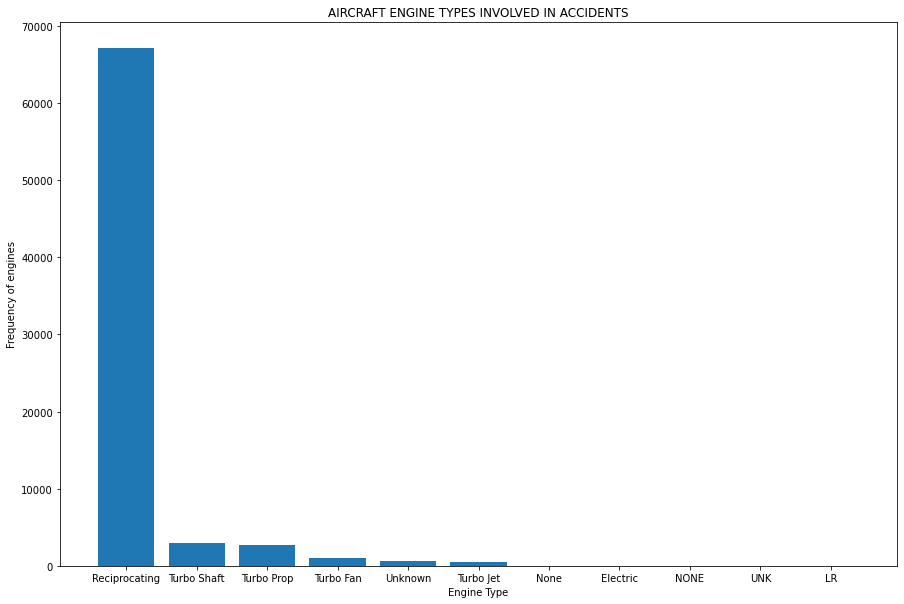

In [30]:
# Plot of the aircraft engine types 
engine_types = clean_df["Engine.Type"].value_counts()


fig, ax = plt.subplots(figsize = (15,10))

ax.bar(engine_types.index, engine_types.values )
ax.set_title("AIRCRAFT ENGINE TYPES INVOLVED IN ACCIDENTS")
ax.set_xlabel("Engine Type")
ax.set_ylabel("Frequency of engines");


**Reciprocating Engines** seem to have a very high frequency of accidents compared to other engine types.

It would be a good idea to avoid aircrafts with that particular engine type or maybe they are the most common engine types in use.

Let's have a plot of the **number of engines** in aircrafts invloved in accidents.

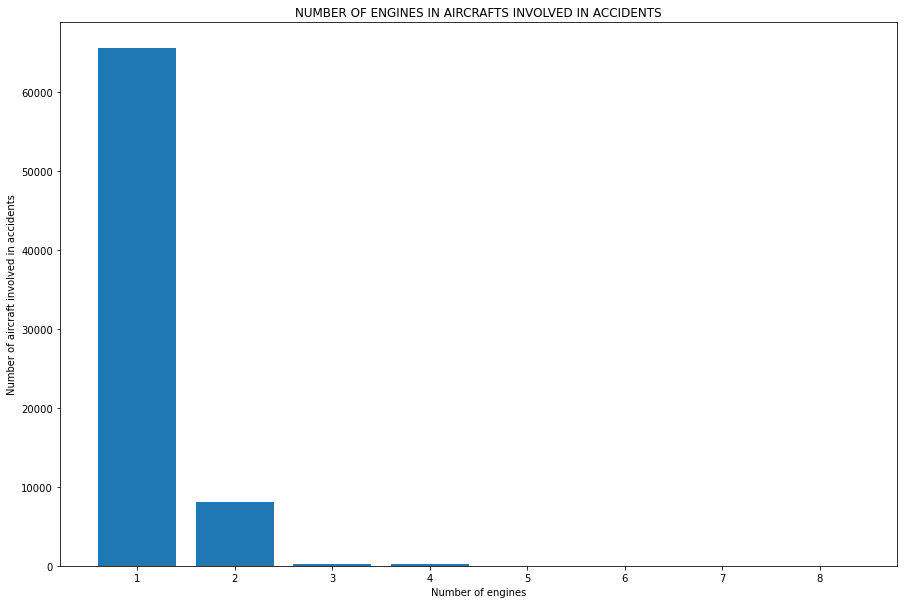

In [31]:
"""there are some values in the number of engines column which are "0"
I want to first filter them out since it does not make sense"""

engine_number_df  = clean_df[clean_df["Number.of.Engines"] > 0] # new datframe where number of engines is greater than 0
engine_number = engine_number_df["Number.of.Engines"].value_counts()


fig, ax = plt.subplots(figsize = (15,10))

ax.bar(engine_number.index, engine_number.values )
ax.set_title("NUMBER OF ENGINES IN AIRCRAFTS INVOLVED IN ACCIDENTS")
ax.set_xlabel("Number of engines")
ax.set_ylabel("Number of aircraft involved in accidents");


So a **single engined** aircraft has a much higher probability of having an accident than an aircraft with multiple engines.

Now to the second question:

**What are the levels of damages sustained by different aircraft types?**

The aim here is to understand the durability levels of different airplane types.

First let's see the different categories of damages and their counts.

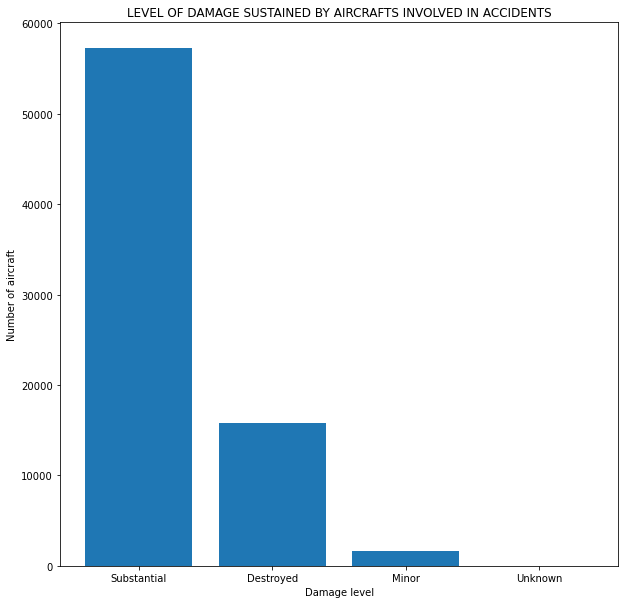

In [32]:
#plot of the different types of damages airplanes suffer after an accident
damage_level_counts = clean_df["Aircraft.damage"].value_counts()


fig, ax = plt.subplots(figsize = (10,10))

ax.bar(damage_level_counts.index, damage_level_counts.values )
ax.set_title("LEVEL OF DAMAGE SUSTAINED BY AIRCRAFTS INVOLVED IN ACCIDENTS")
ax.set_xlabel("Damage level")
ax.set_ylabel("Number of aircraft");


Most aircraft involved in accidents sustain **substantial damages**. Whether this is fixable or not is not yet clear.

A good number (>10,000) were completely **destroyed**.

Let me investigate further and find out whether the **build type** of the aircraft has any effect on its durability during accidents.


In [33]:
clean_df['Amateur.Built'].value_counts() # a count of how many aircraft are amateaur built in the dataset

No     66929
Yes     7814
Name: Amateur.Built, dtype: int64

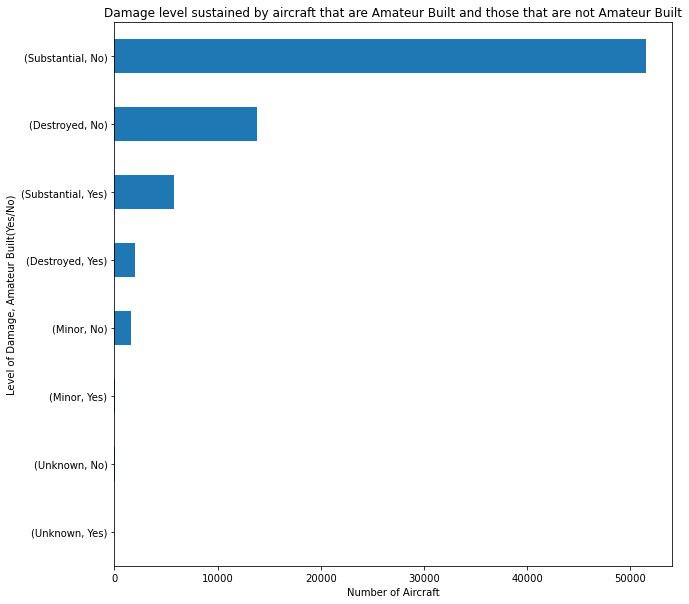

In [34]:
#plot of the damage level of aircrafts of different build types
build_type = clean_df.groupby(['Aircraft.damage', 'Amateur.Built']).size().sort_values(ascending=True)
ax = build_type.plot(kind="barh", figsize=(10,10))
ax.set_title("Damage level sustained by aircraft that are Amateur Built and those that are not Amateur Built")
ax.set_ylabel("Level of Damage, Amateur Built(Yes/No)")
ax.set_xlabel("Number of Aircraft");


Given the disproportionate numbers between amateur built and not amateur built aircrat in the dataset, It appears that aircraft that are **amateur build** sustain **substantial damage** or are **destroyed**.

Let's take a closer look at the **non-amateur** built aircraft **makes** and the **level of damage** after the accidents.

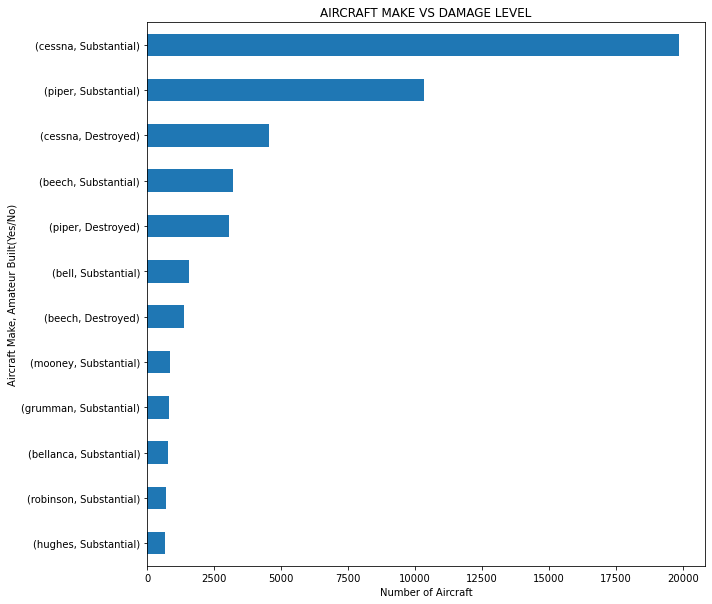

In [44]:
#assuming not amateaur built means professional built,this is a plot of professionally built aircraft vs the damages they mostly sustained.
#it shows the categories of "damage type" and the "aircraft make" with the "highest frequency" of that damage type.
#the categories are the top 12 in descending order based on their overall frequency.

non_amateur_df = clean_df[clean_df["Amateur.Built"] != "Yes"] #seperating the rows with non-amateur built aircraft

non_amateur_make = non_amateur_df.groupby(['Make', 'Aircraft.damage']).size().sort_values(ascending=True)[-12:]
ax = non_amateur_make.plot(kind="barh", figsize=(10,10))
ax.set_title("AIRCRAFT MAKE VS DAMAGE LEVEL")
ax.set_ylabel("Aircraft Make, Amateur Built(Yes/No)")
ax.set_xlabel("Number of Aircraft");

Most of the aircraft makes here appear to be in the **Top 10 most accident prone list** from earlier. No surprises there.

Now on to the final question:
**What are the most common purposes of flights involved in accidents?**

My company wants to venture into the commercial and private side of the aviation business. 
So it is important to know the risks associated with each purpose of a flight, if any.

<ipython-input-46-a03ed3146fb7>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(purpose_counts.index,rotation=90);


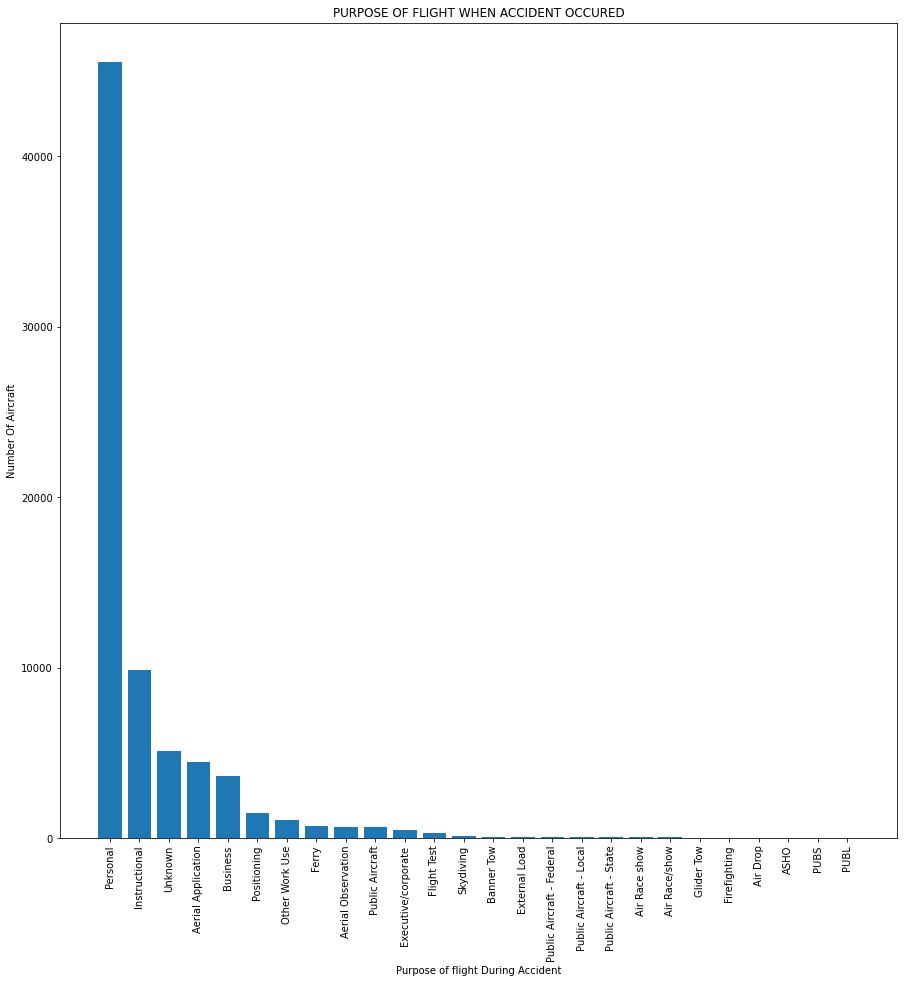

In [46]:
#plot of purpose of flight when accident/incident occured
purpose_counts = clean_df["Purpose.of.flight"].value_counts()

fig, ax = plt.subplots(figsize = (15,15))

ax.bar(purpose_counts.index, purpose_counts.values )
ax.set_title("PURPOSE OF FLIGHT WHEN ACCIDENT OCCURED")
ax.set_xlabel("Purpose of flight During Accident")
ax.set_ylabel("Number Of Aircraft");
ax.set_xticklabels(purpose_counts.index,rotation=90);

**Personal** flights are the highest leading while **Business** flights come in at 5th place.

Let's take a deeper look at both.

In [37]:
#First I create a new column called "year" that only contains the years that the events took place for each record
clean_df["year"] = [x[-4:] for x in clean_df["Event.Date"]] # slicing the last 4 values which represent the years.

<ipython-input-37-f2c14c2d1cdb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["year"] = [x[-4:] for x in clean_df["Event.Date"]] # slicing the last 4 values which represent the years.


<ipython-input-38-9925cc6c790d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(plot_data_2.index,rotation=90);


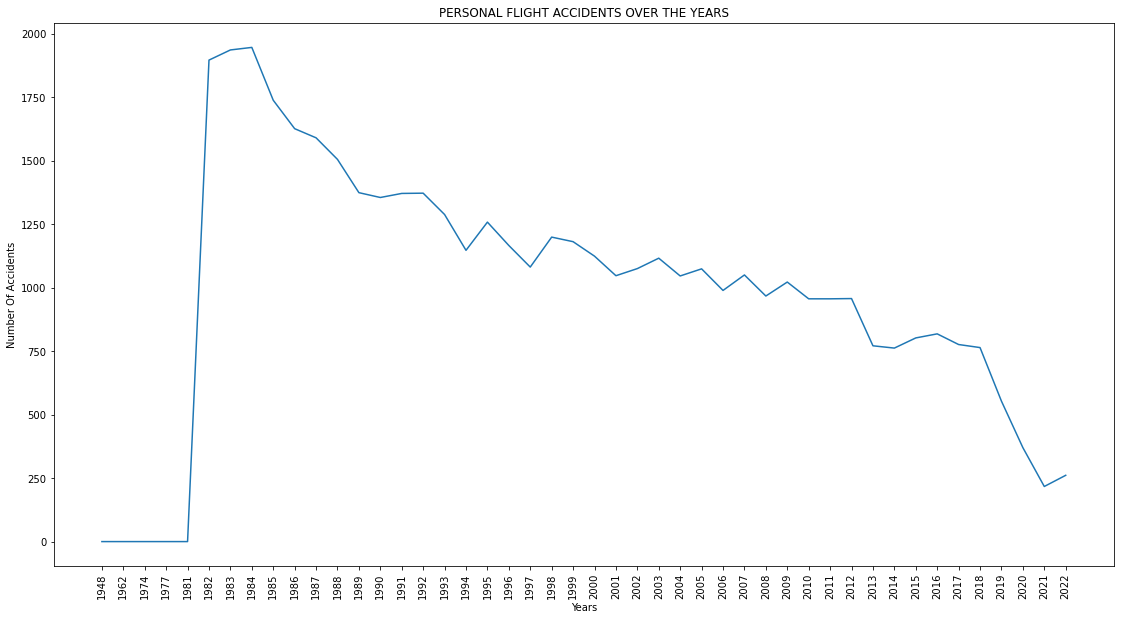

In [38]:
#Creating a dataframe of only records where purpose of flight was "Personal"
personal_flight_df = clean_df[clean_df["Purpose.of.flight"] == "Personal"]

plot_data_2 = personal_flight_df.groupby("year").size() #grouping the data by number of occurences each year

#Plotting the total number of personal flight accidents over the years
fig, ax = plt.subplots(figsize = (19,10))

ax.plot(plot_data_2.index, plot_data_2.values)
ax.set_title("PERSONAL FLIGHT ACCIDENTS OVER THE YEARS")
ax.set_xlabel("Years")
ax.set_ylabel("Number Of Accidents");
ax.set_xticklabels(plot_data_2.index,rotation=90);

There was a sharp increase in the number of **Personal** flights involved in accidents from 1981 but in recent years the number has significantly reduced. However, there seems to be a slight uptrend from 2021.

<ipython-input-39-7ce0cc16798a>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(plot_data_3.index,rotation=90);


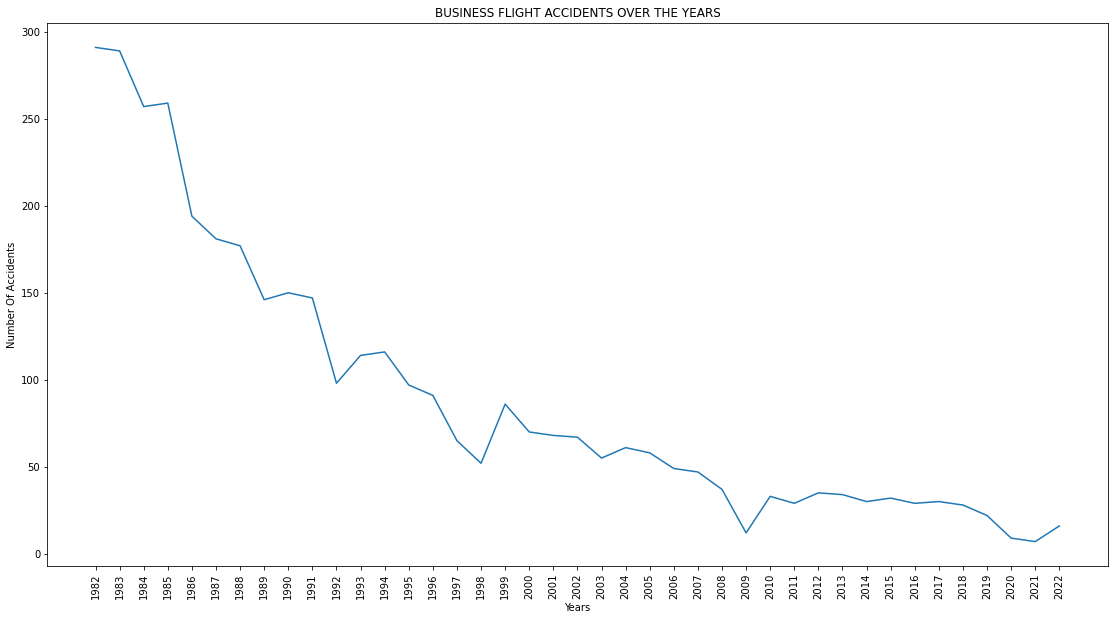

In [39]:
#Creating a dataframe of only records where purpose of flight was "Business"
business_flight_df = clean_df[clean_df["Purpose.of.flight"] == "Business"]

plot_data_3 = business_flight_df.groupby("year").size() #grouping the data by number of occurences each year

#Plotting the total number of personal flight accidents over the years
fig, ax = plt.subplots(figsize = (19,10))

ax.plot(plot_data_3.index, plot_data_3.values)
ax.set_title("BUSINESS FLIGHT ACCIDENTS OVER THE YEARS")
ax.set_xlabel("Years")
ax.set_ylabel("Number Of Accidents");
ax.set_xticklabels(plot_data_3.index,rotation=90);

Generally there has been an overall downtrend in the number of **Business** flights involved in accidents from 1982. There is however a small increase recently from 2021 from all time lows.

**What about the makes and models of flights typically involved in Personal and Business flights?**

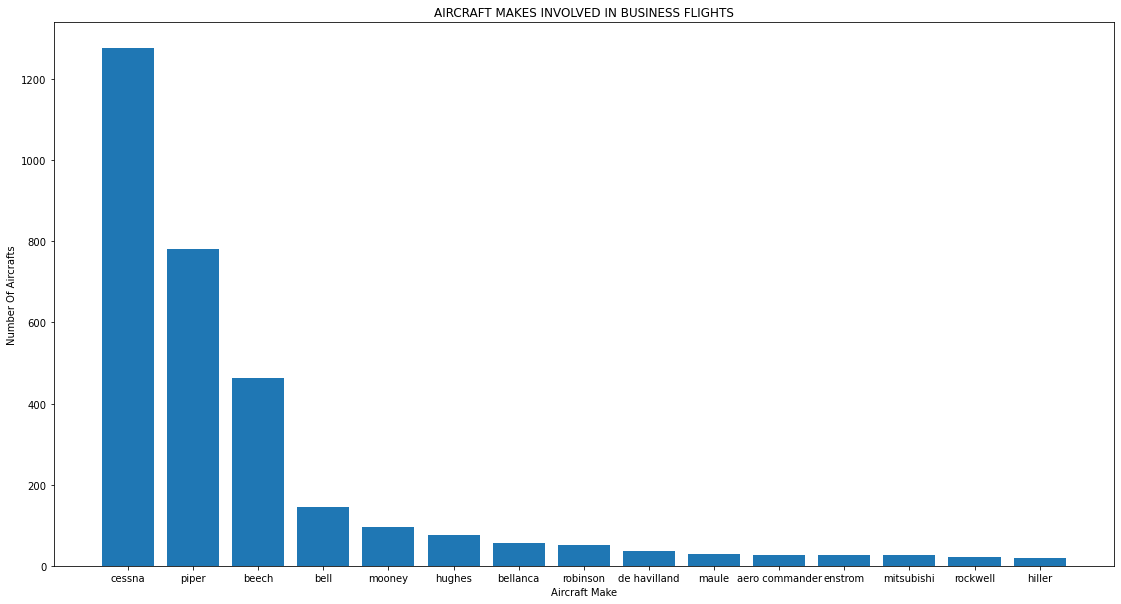

In [40]:
#a plot of the top 15 makes of aircraft typically used for Business flights
aircraft_counts = business_flight_df['Make'].value_counts()[:15]

fig, ax = plt.subplots(figsize = (19,10))

ax.bar(aircraft_counts.index, aircraft_counts.values)
ax.set_title("AIRCRAFT MAKES INVOLVED IN BUSINESS FLIGHTS")
ax.set_xlabel("Aircraft Make")
ax.set_ylabel("Number Of Aircrafts");


There is a slight departure from some of the common aircraft makes seen in most earlier visualizations. **Robinson, De Havilland, Maule, Aero Commander, Enstrom, Mitsubishi, Rockwell** and **Hiller** are other makes that appear to be popular for **Business** flights and they have relatively low accident rates.

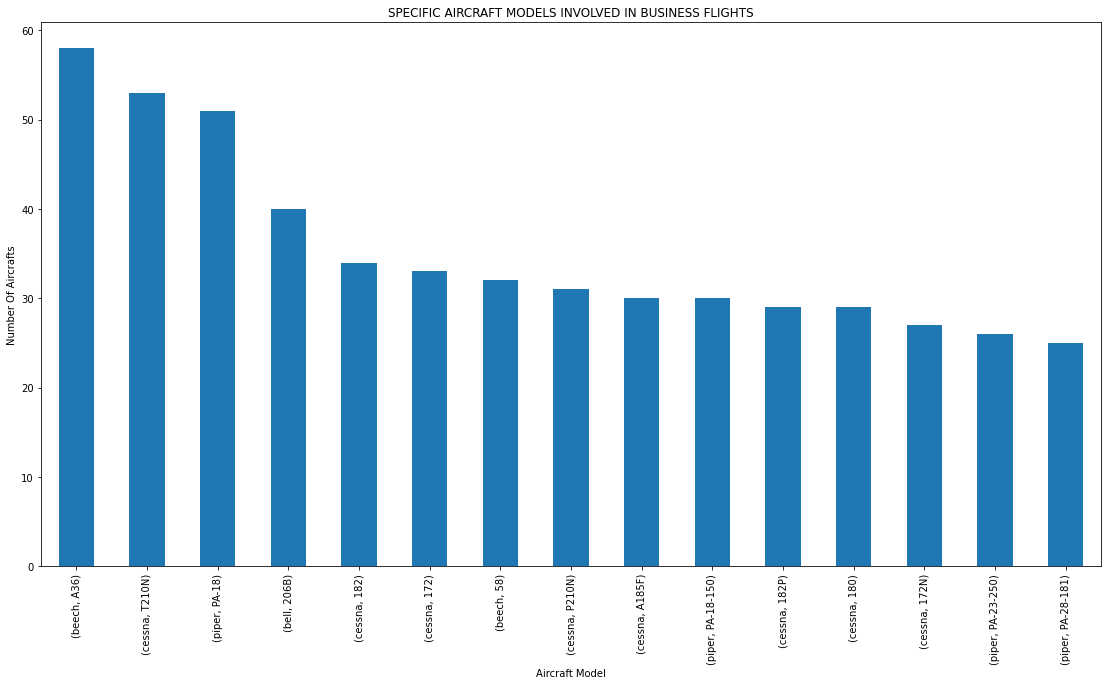

In [41]:
#a plot of the top 15 models of aircraft typically used for Business flights
business_model_counts = business_flight_df.groupby(['Make', 'Model']).size()

top_15_business_model_counts = business_model_counts.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize = (19,10))

top_15_business_model_counts.plot(kind='bar')
ax.set_title("SPECIFIC AIRCRAFT MODELS INVOLVED IN BUSINESS FLIGHTS")
ax.set_xlabel("Aircraft Model")
ax.set_ylabel("Number Of Aircrafts");


Interestingly, the **Beech model A36** was the most common model used for **Business Flights**.

Closely followed by **Cessna model T210N** and **Piper model PA-18**.

For **Personal Flights**:

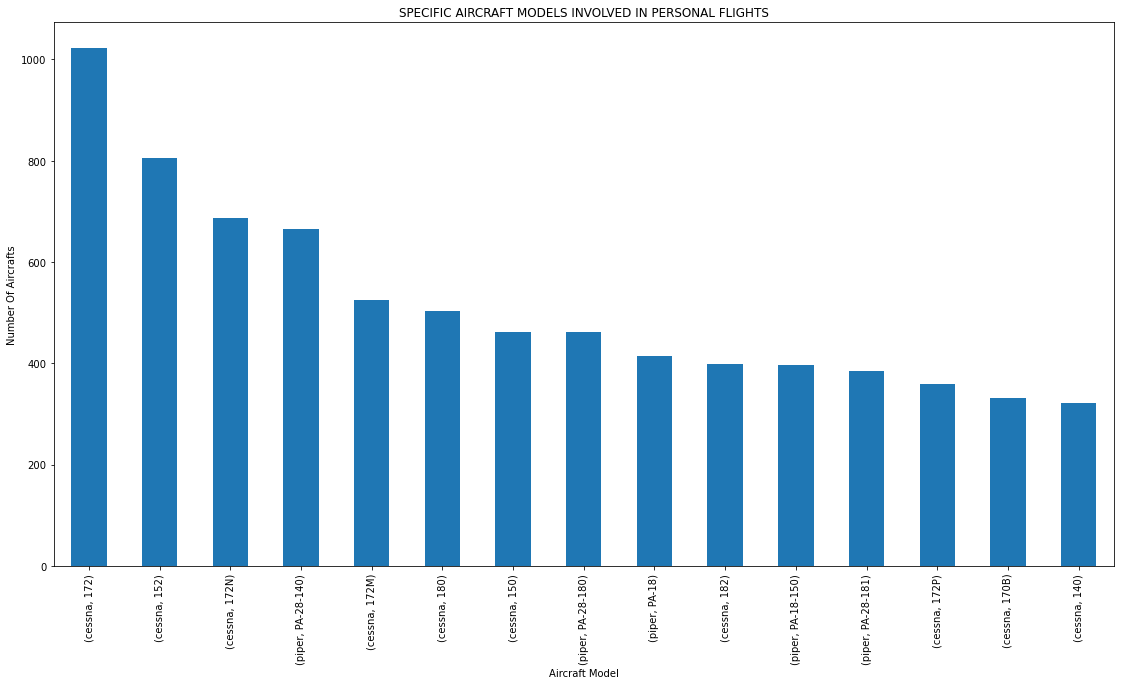

In [42]:
#a plot of the top 15 models of aircraft typically used for Personal flights
personal_model_counts = personal_flight_df.groupby(['Make', 'Model']).size()

top_15_personal_model_counts = personal_model_counts.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize = (19,10))

top_15_personal_model_counts.plot(kind='bar')
ax.set_title("SPECIFIC AIRCRAFT MODELS INVOLVED IN PERSONAL FLIGHTS")
ax.set_xlabel("Aircraft Model")
ax.set_ylabel("Number Of Aircrafts");


For personal flights **Cessna models 172, 152 and 172N** were the most common aircraft used.

Closely followed by **Piper model PA-28-140** aircraft.

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***